### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
print(x)

In [ ]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [5]:
data = pd.read_csv('autos.csv')

In [ ]:
data.head()

In [ ]:
data['price'].hist(bins=50)

In [6]:
data['log_price'] = np.log(data['price'])

In [ ]:
data['log_price'].hist(bins=50)

<Axes: >

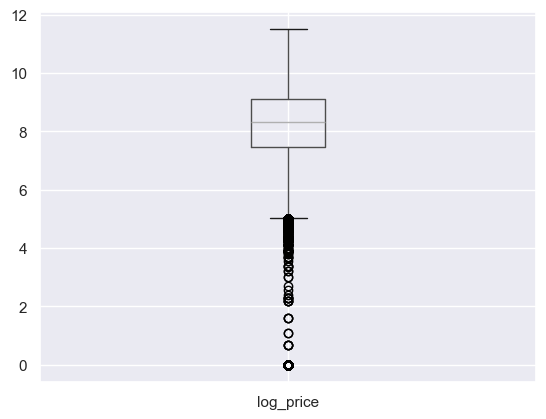

In [7]:
data.boxplot('log_price')

In [8]:
Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
data = data[(data['log_price'] >= lower_bound) & (data['log_price'] <= upper_bound)]

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
brand_log_price = data.groupby('brand')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average price')
plt.title('Average price by brand')
plt.show()

In [ ]:
# Группируем данные по 'brand' и 'model' и находим среднее значение 'price' для каждого бренда и модели
brand_model_price = data.groupby(['brand', 'model'])['price'].mean()

# Создаем отдельный график для каждого бренда
brands = data['brand'].unique()
for brand in brands:
    brand_data = brand_model_price.loc[brand]
    plt.figure(figsize=(8, 5))
    brand_data.plot(kind='bar', color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Average price')
    plt.title(f'Average price by model for brand {brand}')
    plt.show()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
brand_log_price = data.groupby('vehicleType')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Тип транспортного средства')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по типу транспортного средства')
plt.show()

In [ ]:
brand_log_price = data.groupby('gearbox')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по типу трансмиссии')
plt.show()

In [ ]:
brand_log_price = data.groupby('fuelType')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Вид топлива')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по виду топлива')
plt.show()

In [ ]:
brand_log_price = data.groupby('notRepairedDamage')['price'].mean()

# Строим график
plt.figure(figsize=(10, 6))
brand_log_price.plot(kind='bar')
plt.xlabel('Неисправоность')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по неисправности')
plt.show()

In [ ]:
# Строим график
plt.figure(figsize=(10, 6))
plt.scatter(data['powerPS'], data['price'], color='blue')
plt.xlabel('Мощность (powerPS)')
plt.ylabel('Цена')
plt.title('Линейная зависимость цены от мощности')
plt.show()

In [ ]:
# Строим график
plt.figure(figsize=(10, 6))
plt.scatter(data['kilometer'], data['price'], color='blue')
plt.xlabel('Пробег в км')
plt.ylabel('Цена')
plt.title('Линейная зависимость цены от пробега')
plt.show()

In [ ]:
# Строим график
plt.figure(figsize=(10, 6))
plt.scatter(data['autoAgeMonths'], data['price'], color='blue')
plt.xlabel('Возраст авто в месяцах')
plt.ylabel('Цена')
plt.title('Линейная зависимость цены от возраста')
plt.show()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
data['brand_model'] = data['brand'].to_string() + '_' + data['model'].to_string()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Создание объекта StandardScaler
standart_scaler = StandardScaler()

# Применение стандартизации к признаку 'powerPS'
data['powerPS_standardized'] = standart_scaler.fit_transform(data[['powerPS']])

# Создание объекта MinMaxScaler
min_max_scaler = MinMaxScaler()
# Применение нормализации к признаку 'kilometer'
data['kilometer_normalized'] = min_max_scaler.fit_transform(data[['kilometer']])

data['autoAgeMonths_normalized'] = min_max_scaler.fit_transform(data[['autoAgeMonths']])

In [11]:
categorical = ['brand', 'model', 'brand_model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS_standardized', 'kilometer_normalized', 'autoAgeMonths_normalized']
#other = []

In [12]:
#data['bias'] = 1
#other += ['bias']

x = data[categorical + numeric]
y = data['log_price']

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
#    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split

# Сначала разделим на обучающую и временную выборки (80% и 20% соответственно)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

# Затем разделим временную выборку на валидационную и тестовую (10% и 10% от исходного датасета)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# В итоге у нас есть:
# X_train, y_train - обучающая выборка (80%)
# X_val, y_val - валидационная выборка (10%)
# X_test, y_test - тестовая выборка (10%)

## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [15]:
from typing import Dict, List, Tuple
from sklearn.metrics import r2_score

from descents import LossFunction

lambda_values = np.logspace(-4, 1, num=5)

max_iter = 500
tolerance = 1e-4
batch_size = 10
iter_count = 1500


# Преобразование разреженной матрицы в массив NumPy
X_train_array = X_train.toarray()
Y_train_array = y_train.values

# Валидационная выборка
X_val_array = X_val.toarray()
y_val_array = y_val.values

def print_params(lr, last_train_loss, val_loss, r2_train, r2_val, iter_count, mu: float = None, batch_sizes: int = None):
    """
    Выводит в консоль информацию о лучших параметрах модели.

    Этот метод предназначен для вывода значений ключевых метрик и параметров после процесса обучения модели, 
    включая скорость обучения, ошибку на тренировочной и валидационной выборках, а также коэффициент детерминации R^2 
    на тренировочной и валидационной выборках. Параметр mu относится к коэффициенту регуляризации, а batch_sizes — к размеру батча.
    """

    base_message = (
        f'Параметры:\n'
        f'lambda_ = {lr} \n'
        f'Ошибка на тренировочной выборке = {last_train_loss} \n'
        f'Ошибка на валидационной выборке = {val_loss} \n'
        f'R2_train = {r2_train} \n'
        f'R2_val = {r2_val} \n'
        f'Iter_count = {iter_count}\n'
    )

    if mu is not None:
        base_message += f'mu = {mu} \n'

    if batch_sizes is not None:
        base_message += f'Batch_size = {batch_sizes} \n'
    
    print(base_message)


def get_train_result(loss_function: LossFunction = LossFunction.MSE ,lr: float = 0.01, descent_name: str = 'adam', descent_reg: bool = False, isBasis: bool = True, mu: float = 0.1,  batch_size: int = None, tolerance: float = 1e-4, 
                     max_iter: int = 500, min_loss: float = 0) -> Tuple[float, float, float, float, List[float]]:
    """
    Обучает модель линейной регрессии, используя заданную конфигурацию градиентного спуска, и возвращает результаты.

    Parameters:
    ----------
    lr : float, optional
        Скорость обучения (learning rate). По умолчанию равно 0.01.
    descent_name : str, optional
        Название метода градиентного спуска. Поддерживает 'adam' и 'stochastic'. По умолчанию 'adam'.
    batch_size : int, optional
        Размер батча для стохастического градиентного спуска. Только для 'stochastic'. По умолчанию None.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Максимальное количество итераций обучения. По умолчанию равно 500.

    Returns:
    -------
    tuple
        Возвращает кортеж, содержащий следующие элементы:
        - r2_train (float): Коэффициент детерминации R^2 на обучающем наборе данных.
        - r2_val (float): Коэффициент детерминации R^2 на валидационном наборе данных.
        - last_train_loss (float): Значение функции потерь на последней итерации обучения.
        - val_loss (float): Значение функции потерь на валидационном наборе данных.
        - loss_history (list[float]): История значений функции потерь в процессе обучения.

    Примечания:
    ----------
    - Предполагается, что `X_train_array`, `Y_train_array`, `X_val_array`, `y_val_array` 
      являются глобально определенными переменными и содержат данные для обучения и валидации модели.
    - Метод `fit` модели `LinearRegression` использует `descent_config` для конфигурации выбранного метода градиентного спуска.
    """
    
    if descent_reg:
        if descent_name == 'stochastic':
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': descent_reg, 
                    'kwargs': {
                        'dimension': X_train.shape[1],                    
                        'batch_size': batch_size,
                        'lambda_' : lr,                    
                        'mu': mu,
                        'isBasis': isBasis
                    }
                }
        else:
            descent_config = {
                        'descent_name': descent_name,
                        'regularized': descent_reg, 
                        'kwargs': {
                            'dimension': X_train.shape[1],                                           
                            'lambda_' : lr,                        
                            'mu': mu,
                            'isBasis': isBasis
                        }
                    }
    else:
        if descent_name == 'stochastic':
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': descent_reg, 
                    'kwargs': {
                        'dimension': X_train.shape[1],                    
                        'batch_size': batch_size,
                        'lambda_' : lr,
                        'isBasis': isBasis,
                        'loss_function': loss_function
                    }
                }
        else:
            descent_config = {
                        'descent_name': descent_name,
                        'regularized': descent_reg, 
                        'kwargs': {
                            'dimension': X_train.shape[1],                                           
                            'lambda_' : lr,
                            'isBasis': isBasis,
                            'loss_function': loss_function
                        }
                    }

    regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
            min_loss=min_loss
        )

    regression.fit(X_train_array, Y_train_array)

    r2_train = r2_score(Y_train_array, regression.predict(X_train_array))
    r2_val = r2_score(y_val, regression.predict(X_val_array))
    last_train_loss = regression.loss_history[-1]
    val_loss = regression.calc_loss(X_val_array, y_val_array)
    loss_history = regression.loss_history    
    
    return r2_train, r2_val, last_train_loss, val_loss, loss_history

def start_lr_seach(lambda_values, descent_name: str = 'adam', descent_reg: bool = False, isBasis: bool = True, batch_size: int = None, tolerance: float = 1e-4, 
                   max_iter: int = 300, min_loss: float = 0) -> Tuple[List[Dict[str, List[float]]], List[List[float]]]:
    """
    Выполняет поиск по сетке скоростей обучения (learning rates) для оценки их влияния на обучение модели.

    Parameters:
    ----------
    lambda_values : iterable
        Перечислимый объект (например, список или массив), содержащий значения скорости обучения для тестирования.
    descent_name : str, optional
        Название метода градиентного спуска. Поддерживаются 'adam' и 'stochastic'. По умолчанию 'adam'.
    batch_size : int, optional
        Размер батча для стохастического градиентного спуска. Только если descent_name='stochastic'. По умолчанию None.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Максимальное количество итераций обучения. По умолчанию равно 500.

    Returns:
    -------
    tuple
        Возвращает кортеж из двух элементов:
        - Первый элемент (list of dict): Список словарей, где каждый словарь содержит пару ключей 'lr' (значение скорости обучения) 
          и 'loss_history' (список значений функции потерь для данного значения скорости обучения).
        - Второй элемент (list of list): Список списков, где каждый внутренний список содержит результаты для одного значения 
          скорости обучения, включая само значение скорости обучения, значение функции потерь на последней итерации обучения, 
          значение функции потерь на валидационном наборе данных, коэффициенты детерминации R^2 на обучающем и валидационном 
          наборах данных, и максимальное количество итераций.

    Пример использования:
    --------------------
    lambda_values = [0.001, 0.01, 0.1]
    list_of_dicts, results = start_lr_search(lambda_values, descent_name='adam', max_iter=500)
    
    # Далее, вы можете анализировать 'list_of_dicts' и 'results' для определения оптимального значения скорости обучения.
    """

    result = []
    lrs = []
    loss_histories = []

    for lr in lambda_values:
        r2_train, r2_val, last_train_loss, val_loss, loss_history = get_train_result(lr=lr, descent_name=descent_name, descent_reg=descent_reg, 
                                                                                     isBasis=isBasis,
                                                                                     batch_size=batch_size, tolerance=tolerance, 
                                                                                     max_iter=max_iter, min_loss=min_loss)  

        iter_count = len(loss_history)
        result.append([lr, last_train_loss, val_loss, r2_train, r2_val, iter_count])  
        lrs.append(lr)
        loss_histories.append(loss_history)

        print_params(lr, last_train_loss, val_loss, r2_train, r2_val, iter_count)

    list_of_dictionaries = [{"lr": lr, "loss_history": loss_history} for lr, loss_history in zip(lrs, loss_histories)]

    df_result = pd.DataFrame(result)
    df_result.columns = ['Learning_Rate', 'Error_Trein', 'Error_Val', 'R2_Train', 'R2_Val', 'Iter_count']

    return list_of_dictionaries, df_result

def start_lr_and_mu_seach(lambda_values, mu_valuse, descent_name: str = 'adam', descent_reg: bool = False, isBasis: bool = True, 
                          batch_size: int = None, tolerance: float = 1e-4, max_iter: int = 300) -> Tuple[List[Dict[str, List[float]]], List[List[float]]]:
    """
    Выполняет поиск по сетке скоростей обучения (learning rates) для оценки их влияния на обучение модели.

    Parameters:
    ----------
    lambda_values : iterable
        Перечислимый объект (например, список или массив), содержащий значения скорости обучения для тестирования.
    descent_name : str, optional
        Название метода градиентного спуска. Поддерживаются 'adam' и 'stochastic'. По умолчанию 'adam'.
    batch_size : int, optional
        Размер батча для стохастического градиентного спуска. Только если descent_name='stochastic'. По умолчанию None.
    tolerance : float, optional
        Критерий остановки для квадрата евклидова нормы разности весов. По умолчанию равен 1e-4.
    max_iter : int, optional
        Максимальное количество итераций обучения. По умолчанию равно 500.

    Returns:
    -------
    tuple
        Возвращает кортеж из двух элементов:
        - Первый элемент (list of dict): Список словарей, где каждый словарь содержит пару ключей 'lr' (значение скорости обучения) 
          и 'loss_history' (список значений функции потерь для данного значения скорости обучения).
        - Второй элемент (list of list): Список списков, где каждый внутренний список содержит результаты для одного значения 
          скорости обучения, включая само значение скорости обучения, значение функции потерь на последней итерации обучения, 
          значение функции потерь на валидационном наборе данных, коэффициенты детерминации R^2 на обучающем и валидационном 
          наборах данных, и максимальное количество итераций.

    Пример использования:
    --------------------
    lambda_values = [0.001, 0.01, 0.1]
    list_of_dicts, results = start_lr_search(lambda_values, descent_name='adam', max_iter=500)
    
    # Далее, вы можете анализировать 'list_of_dicts' и 'results' для определения оптимального значения скорости обучения.
    """

    result = []
    lrs = []
    mus = []
    loss_histories = []

    for lr in lambda_values:
        for mu in mu_valuse:

            r2_train, r2_val, last_train_loss, val_loss, loss_history = get_train_result(lr=lr, descent_name=descent_name, descent_reg=descent_reg, isBasis=isBasis,
                                                                                        mu=mu, batch_size=batch_size, tolerance=tolerance, max_iter=max_iter)  

            result.append([lr, mu, last_train_loss, val_loss, r2_train, r2_val, max_iter])  
            lrs.append(lr)
            loss_histories.append(loss_history)
            mus.append(mu)
            list_of_dictionaries = [{"lr": lr, "mu": mu, "loss_history": loss_history} for lr, mu, loss_history in zip(lrs, mus, loss_histories)]
            iter_count = len(loss_history)
            
            print_params(lr, last_train_loss, val_loss, r2_train, r2_val, iter_count)

            df_result = pd.DataFrame(result)
            df_result.columns = ['Learning_Rate', 'Mu', 'Error_Trein', 'Error_Val', 'R2_Train', 'R2_Val', 'Iter_count']

    return list_of_dictionaries, df_result 

### Анализ сходимости Full градиентного спуска

В ходе продолжительных испытаний на некоторых параметрах lr сходимость не достигается за разумное время. По этому ограничимся 500 эпохами, и значением в 0.35 для параметра ошибки модели. Если за 500 итераций значение выше порогового, то будем сяитать что сходимость не достигается за разумное время и эти параметры не могут быть оптемальными. Если ошибка меньше 0.35 то считаем что сходимость достигнута.

In [ ]:
#
full_lr_loss_history, full_df = start_lr_seach(lambda_values=lambda_values, descent_name='full', min_loss=0.35)

# Строим график зависимости lr от error

def plot_err_vs_lr(df: pd.DataFrame, descent_name: str = 'full'):

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Learning_Rate', y='Error_Val', data=df, label='Validation Error')
    sns.lineplot(x='Learning_Rate', y='Error_Trein', data=df, label='Training Error')
    plt.xlabel('Learning Rate')
    plt.ylabel('Error')
    title = descent_name + ' Error vs Learning Rate'
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_err_vs_lr(full_df, descent_name='Full')

In [ ]:
pd.set_option('display.float_format', lambda d: '%.5f' % d)
full_df

In [ ]:
# Создаем отдельный график для каждого значения lr
def plot_loss_history(loss_history_by_descent, descent_name: str = 'adam'):

    for dictionary in loss_history_by_descent:
        lr = dictionary["lr"]
        loss_history = dictionary["loss_history"]
        
        # Создаем новый график
        plt.figure(figsize=(8, 4))
        plt.plot(loss_history, marker='o', linestyle='-')
        
        # Добавляем заголовок, включающий значение lr
        plt.title(f'{descent_name} loss history for Learning Rate : {lr}')
        
        # Называем оси
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        
        # Отображаем график
        plt.show()

In [ ]:
plot_loss_history(loss_history_by_descent=full_lr_loss_history, descent_name='Full')

Из графиков видно, что оптемальное значение lr находится где то в районе 0.06. Попробуем подобрать его в ручную, как и количество необходимых итераций для более глубокой сходимости.

In [ ]:
full_lr = 0.03162
full_r2_train, full_r2_val, full_last_train_loss, full_val_loss, full_loss_history = get_train_result(lr=full_lr, descent_name='full', max_iter=iter_count, min_loss=0.26)

In [ ]:
def plot_optimal_loss_history(loss_history):
    # Выводим историю ошибок на график
    plt.figure(figsize=(8, 4))
    plt.plot(loss_history)

    plt.figure(figsize=(8, 4))    
    filtered_regression_history= [val for val in loss_history if val < 1]
    # Создаем график для отфильтрованных значений
    plt.plot(filtered_regression_history)

plot_optimal_loss_history(full_loss_history)

### Анализ StochasticDescent

In [ ]:
stochastic_lr_loss_history, stochastic_df = start_lr_seach(lambda_values=lambda_values, descent_name='stochastic', batch_size=batch_size, min_loss=0.35)

In [ ]:
plot_err_vs_lr(stochastic_df, descent_name='Stochastic')

In [ ]:
plot_loss_history(loss_history_by_descent=stochastic_lr_loss_history, descent_name='Stochastic')

In [ ]:
stochastic_df

In [1]:
stochastic_lr = 0.03162
stochastic_r2_train, stochastic_r2_val, stochastic_last_train_loss, stochastic_val_loss, stochastic_loss_history = get_train_result(lr=stochastic_lr, descent_name='stochastic', max_iter=iter_count, batch_size=batch_size, min_loss=0.26)

NameError: name 'get_train_result' is not defined

In [ ]:
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, len(stochastic_loss_history))

In [ ]:
plot_optimal_loss_history(stochastic_loss_history)

### Momentum

In [ ]:
momentum_lr_loss_history, momentum_df = start_lr_seach(lambda_values=lambda_values, descent_name='momentum')

In [ ]:
plot_loss_history(momentum_lr_loss_history, 'Momentum')

In [ ]:
plot_err_vs_lr(momentum_df)

In [ ]:
momentum_df

In [ ]:
momentum_lr = 0.03162
momentum_r2_train, momentum_r2_val, momentum_last_train_loss, momentum_val_loss, momentum_loss_history = get_train_result(lr=momentum_lr, descent_name='momentum', max_iter=iter_count, min_loss=0.26)

In [ ]:
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, momentum_r2_train, momentum_r2_val, len(momentum_loss_history))

In [ ]:
plot_optimal_loss_history(momentum_loss_history)

### Adam

In [ ]:
adam_lr_loss_history, adam_df = start_lr_seach(lambda_values=lambda_values, descent_name='adam')

In [ ]:
plot_loss_history(adam_lr_loss_history, descent_name='Adam')

In [ ]:
plot_err_vs_lr(adam_df, descent_name='Adam')

In [ ]:
adam_df

In [ ]:
adam_lr = 0.56234
adam_r2_train, adam_r2_val, adam_last_train_loss, adam_val_loss, adam_loss_history = get_train_result(lr=adam_lr, descent_name='adam', max_iter=iter_count, min_loss=0.26)

In [ ]:
print_params(adam_lr, adam_last_train_loss, adam_val_loss, adam_r2_train, adam_r2_val, len(adam_loss_history))

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [ ]:
plot_optimal_loss_history(full_loss_history)

In [ ]:
plot_optimal_loss_history(stochastic_loss_history)

In [ ]:
plot_optimal_loss_history(momentum_loss_history)

In [ ]:
plot_optimal_loss_history(adam_loss_history)

In [ ]:
print_params(full_lr, full_last_train_loss, full_val_loss, full_r2_train, full_r2_val, len(full_loss_history))

In [ ]:
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, len(stochastic_loss_history))

In [ ]:
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, momentum_r2_train, momentum_r2_val, len(momentum_loss_history))

In [ ]:
print_params(adam_lr, adam_last_train_loss, adam_val_loss, adam_r2_train, adam_r2_val, len(adam_loss_history))

Выше представленны результаты работы 4х различных методов градиентного спуска. Быстрей всего до минимального значения MSE сходится Adam. 

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [ ]:
import time

from matplotlib.pyplot import tick_params

batch_sizes = np.arange(10, 1000, 100)
columns = ['batch_size', 'time_result', 'iter_count', 'r2_train', 'r2_val', 'last_train_loss', 'val_loss']

sgd_res_df = pd.DataFrame(columns=columns)

for batch in batch_sizes:

    

    for k in range(10):
        start_time = time.perf_counter()  

        r2_train, r2_val, last_train_loss, val_loss, loss_history =  get_train_result(lr=stochastic_lr, descent_name='stochastic', batch_size=batch, min_loss=0.335)

        end_time = time.perf_counter() 
        time_result = end_time - start_time

        temp_dict = {
            'batch_size': batch, 
            'time_result': time_result, 
            'iter_count': len(loss_history), 
            'r2_train': r2_train, 
            'r2_val': r2_val, 
            'last_train_loss': last_train_loss, 
            'val_loss': val_loss
        }

        print(temp_dict)
        # Превращаем словарь в строку DataFrame и добавляем к основному DataFrame
        # Создаём временный DataFrame из словаря
        temp_df = pd.DataFrame([temp_dict])
        
        # Используем pd.concat для добавления строки
        sgd_res_df = pd.concat([sgd_res_df, temp_df], ignore_index=True)  

In [ ]:
sgd_res_df

In [ ]:
grouped_loss = sgd_res_df.groupby('batch_size')['last_train_loss'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(grouped_loss['batch_size'], grouped_loss['last_train_loss'], marker='o', linestyle='-', color='b')
plt.title('Зависимость среднего количества итераций до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Средняя ошибка для указанного бача')
plt.grid(True)
plt.show()

In [ ]:
# Группируем по размеру батча и считаем среднее количество итераций
grouped_iter = sgd_res_df.groupby('batch_size')['iter_count'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(grouped_iter['batch_size'], grouped_iter['iter_count'], marker='o', linestyle='-', color='b')
plt.title('Зависимость среднего количества итераций до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итераций до сходимости')
plt.grid(True)
plt.show()

In [ ]:
grouped_iter

In [ ]:
# Группируем по размеру батча и считаем среднее количество итераций
grouped_time = sgd_res_df.groupby('batch_size')['time_result'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(grouped_time['batch_size'], grouped_time['time_result'], marker='o', linestyle='-', color='b')
plt.title('Зависимость среднего времени до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время до сходимости')
plt.grid(True)
plt.show()

In [ ]:
grouped_time

Исходя из результатов по времени и количеству итераций опримальный размер бача находится в районе 100.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [ ]:
mu_values = np.logspace(-4, 1, num=5)

### Full mu и lr анализ

In [ ]:
full_mu_and_lr_loss, full_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='full', descent_reg=True)

In [ ]:
full_mu_and_lr_df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_loss_mu_lr(list_of_dictionaries):
    # Первоначальный код для получения исходных данных
    lrs = [d['lr'] for d in list_of_dictionaries]
    mus = [d['mu'] for d in list_of_dictionaries]
    last_losses = [d['loss_history'][-1] for d in list_of_dictionaries]
    last_losses = np.clip(last_losses, None, 1)
    lrs = np.array(lrs)
    mus = np.array(mus)
    last_losses = np.array(last_losses)

    # Построение первого графика
    fig = plt.figure(figsize=(14, 6))

    # Первый график
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(lrs, mus, last_losses, c=last_losses, cmap='viridis')
    ax1.set_xlabel('Learning Rate (lr)')
    ax1.set_ylabel('Regularization Coefficient (mu)')
    ax1.set_zlabel('Last Loss')
    ax1.set_title('Original Data')
    fig.colorbar(scatter1, shrink=0.5, aspect=5)

    # Ограничение lr и mu значениями до 0.05
    lrs_clipped = np.clip(lrs, None, 0.05)
    mus_clipped = np.clip(mus, None, 0.05)

    # Второй график
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(lrs_clipped, mus_clipped, last_losses, c=last_losses, cmap='viridis')
    ax2.set_xlabel('Learning Rate (lr)')
    ax2.set_ylabel('Regularization Coefficient (mu)')
    ax2.set_zlabel('Last Loss')
    ax2.set_title('Clipped Data (lr, mu <= 0.05)')
    fig.colorbar(scatter2, shrink=0.5, aspect=5)

    plt.tight_layout()
    plt.show()
    
plot_3d_loss_mu_lr(full_mu_and_lr_loss)

In [ ]:
full_mu_lr = 0.03162
full_mu = 0.03162

In [ ]:
full_mu_r2_train, full_mu_r2_val, full_mu_last_train_loss, full_mu_val_loss, full_mu_loss_history = get_train_result(lr=full_mu_lr, descent_name='full', descent_reg=True, mu=full_mu, max_iter=iter_count, min_loss=0.26)

In [ ]:
print_params(full_mu_lr, full_mu_last_train_loss, full_mu_val_loss, full_mu_r2_train, full_mu_r2_val, iter_count=iter_count, mu=full_mu)
print_params(full_lr, full_last_train_loss, full_val_loss, full_r2_train, full_r2_val, iter_count=iter_count)

In [ ]:
def plot_error_lines(errors, errors_mu, start_val: int = 100):
    """
    Функция для отображения двух линий ошибок на графике, а также второго графика
    с данными начиная с 100-й итерации.

    Параметры:
    - errors: Список значений ошибок для метода без регуляризации.
    - errors_mu: Список значений ошибок для метода с регуляризацией.
    """
    
    # Создаем фигуру и два подграфика (subplots)
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    
    # Первый подграфик для всех данных
    axs[0].plot(range(1, len(errors) + 1), errors, label='Ошибки', marker='o')
    axs[0].plot(range(1, len(errors_mu) + 1), errors_mu, label='Ошибки с регуляризацией', marker='s')
    axs[0].set_title('График всех ошибок')
    axs[0].set_xlabel('Номер итерации')
    axs[0].set_ylabel('Значение ошибки')
    axs[0].legend()

    
    axs[1].plot(range(start_val + 1, len(errors) + 1), errors[start_val:], label='Ошибки', marker='o')
    axs[1].plot(range(start_val + 1, len(errors_mu) + 1), errors_mu[start_val:], label='Ошибки с регуляризацией', marker='s')
    axs[1].set_title('График ошибок с {}-й итерации'.format(start_val))
    axs[1].set_xlabel('Номер итерации')
    axs[1].set_ylabel('Значение ошибки')
    axs[1].legend()


    plt.tight_layout()
    plt.show()

plot_error_lines(full_loss_history, full_mu_loss_history)

### Stochastic mu lr

In [ ]:
stochastic_mu_and_lr_loss, stochastic_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='stochastic', 
                                                                           descent_reg=True, batch_size=batch_size)

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [ ]:
plot_3d_loss_mu_lr(stochastic_mu_and_lr_loss)

In [ ]:
stochastic_mu_and_lr_df

In [ ]:
stochastic_mu_lr = 0.03162
stochastic_mu = 0.03162

In [ ]:

stochastic_mu_r2_train, stochastic_mu_r2_val, stochastic_mu_last_train_loss, stochastic_mu_val_loss, stochastic_mu_loss_history = get_train_result(lr=stochastic_mu_lr, descent_name='stochastic', descent_reg=True, mu=stochastic_mu, batch_size=batch_size, max_iter=iter_count, min_loss=0.26)

In [ ]:
print_params(stochastic_mu_lr, stochastic_mu_last_train_loss, stochastic_mu_val_loss, stochastic_mu_r2_train, stochastic_mu_r2_val, 
             iter_count=len(stochastic_mu_loss_history), mu=stochastic_mu, batch_sizes=batch_size)
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, iter_count=len(stochastic_loss_history), batch_sizes=batch_size)

In [ ]:
plot_error_lines(stochastic_loss_history, stochastic_mu_loss_history, 50)

### Momentum lr mu  

In [ ]:
momentum_mu_and_lr_loss, momentum_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='momentum', descent_reg=True)

In [ ]:
momentum_mu_and_lr_df

In [ ]:
plot_3d_loss_mu_lr(momentum_mu_and_lr_loss)

In [ ]:
momentum_mu_lr = 0.03162
momentum_mu = 0.03162

In [ ]:

momentum_mu_r2_train, momentum_mu_r2_val, momentum_mu_last_train_loss, momentum_mu_val_loss, momentum_mu_loss_history = get_train_result(lr=momentum_mu_lr, descent_name='momentum', descent_reg=True, mu=momentum_mu, max_iter=iter_count, min_loss=0.26)

In [ ]:
# Печать параметров для градиентного спуска с моментом и регуляризацией
print_params(momentum_mu_lr, momentum_mu_last_train_loss, momentum_mu_val_loss, 
             momentum_mu_r2_train, momentum_mu_r2_val, iter_count=len(momentum_mu_loss_history), 
             mu=momentum_mu)

# Печать параметров для градиентного спуска с моментом без регуляризации
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, 
             momentum_r2_train, momentum_r2_val, iter_count=len(momentum_loss_history))

In [ ]:
plot_error_lines(momentum_loss_history, momentum_mu_loss_history, 50)

### Adam lr mu

In [ ]:
adam_mu_and_lr_loss, adam_mu_and_lr_df = start_lr_and_mu_seach(lambda_values=lambda_values, mu_valuse=mu_values, descent_name='adam', descent_reg=True) 

In [ ]:
adam_mu_and_lr_df

In [ ]:
plot_3d_loss_mu_lr(adam_mu_and_lr_loss)

In [ ]:
adam_mu_lr = 0.56234
adam_mu = 0.00010
iter_count = 500

In [ ]:

adam_mu_r2_train, adam_mu_r2_val, adam_mu_last_train_loss, adam_mu_val_loss, adam_mu_loss_history = get_train_result(lr=adam_mu_lr, descent_name='adam', descent_reg=True, mu=adam_mu, max_iter=iter_count, min_loss=0.257)

In [ ]:
# Печать параметров для градиентного спуска с Adam и регуляризацией
print_params(adam_mu_lr, adam_mu_last_train_loss, adam_mu_val_loss, 
             adam_mu_r2_train, adam_mu_r2_val, iter_count=len(adam_mu_loss_history), 
             mu=adam_mu)

# Печать параметров для градиентного спуска с Adam без регуляризации
print_params(adam_lr, adam_last_train_loss, adam_val_loss, 
             adam_r2_train, adam_r2_val, iter_count=len(adam_loss_history))

In [ ]:
plot_error_lines(adam_loss_history, adam_mu_loss_history, 50)

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

Давайте найдем производную функции потерь $L(y, a)$ по $a$, используя данную формулу:
$$
    L(y, a)
    =
    \log(\cosh(a - y)).
$$

Шаги дифференцирования:

1. **Найдем внешнюю производную** функции относительно $a$, используя цепное правило. Внешняя функция здесь — это $\log(z)$, где $z = \cosh(a - y)$. Производная $\log(z)$ по $z$ равна $\frac{1}{z}$.
   
   Таким образом, внешняя производная будет:
   $$
   \frac{d}{dz} \log(z) = \frac{1}{z} = \frac{1}{\cosh(a - y)}.
   $$

2. **Найдем внутреннюю производную** функции относительно $a$. Внутренняя функция здесь — это $\cosh(a - y)$, где $a - y$ является аргументом функции косинуса гиперболического.

   Производная $\cosh(x)$ по $x$ равна $\sinh(x)$. Поэтому, производная $\cosh(a - y)$ по $a$ равна $\sinh(a - y)$.

3. **Применим цепное правило**, умножив внешнюю производную на внутреннюю. Итак, производная $L(y, a)$ по $a$ равна:
   $$
   \frac{dL}{da} = \frac{1}{\cosh(a - y)} \cdot \sinh(a - y).
   $$

4. **Упрощение выражения**. Данное выражение уже достаточно простое и представляет собой итоговую производную функции потерь по $a$.

Итак, производная функции потерь $L(y, a)$ по $a$ равна:
$$
\frac{dL}{da} = \frac{\sinh(a - y)}{\cosh(a - y)}.
$$

Это выражение также можно упростить, зная, что $\frac{\sinh(x)}{\cosh(x)} = \tanh(x)$, получим:
$$
\frac{dL}{da} = \tanh(a - y).
$$

Это окончательный результат дифференцирования заданной функции потерь.

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
adam_logcosh_r2_train, adam_logcosh_r2_val, adam_logcosh_last_train_loss, adam_logcosh_val_loss, adam_logcosh_loss_history = get_train_result(loss_function=LossFunction.LogCosh, 
                                                                                                                     lr=adam_mu_lr, descent_name='adam')

In [ ]:
# Печать параметров для градиентного спуска с Adam с функцией потель LogCosh
print_params(adam_mu_lr, adam_logcosh_last_train_loss, adam_logcosh_val_loss, 
             adam_logcosh_r2_train, adam_logcosh_r2_val, iter_count=len(adam_logcosh_loss_history))

In [ ]:
# Печать параметров для градиентного спуска с Adam
print_params(adam_lr, adam_last_train_loss, adam_val_loss, 
             adam_r2_train, adam_r2_val, iter_count=len(adam_loss_history))

In [ ]:
momentum_logcosh_r2_train, momentum_logcosh_r2_val, momentum_logcosh_last_train_loss, momentum_logcosh_val_loss, momentum_logcosh_loss_history = get_train_result(
    loss_function=LossFunction.LogCosh, lr=momentum_mu_lr, descent_name='momentum')

In [ ]:
print_params(momentum_mu_lr, momentum_logcosh_last_train_loss, momentum_logcosh_val_loss, 
             momentum_logcosh_r2_train, momentum_logcosh_r2_val, iter_count=len(momentum_logcosh_loss_history))

In [ ]:
print_params(momentum_lr, momentum_last_train_loss, momentum_val_loss, 
             momentum_r2_train, momentum_r2_val, iter_count=len(momentum_loss_history))

In [ ]:
stochastic_logcosh_r2_train, stochastic_logcosh_r2_val, stochastic_logcosh_last_train_loss, stochastic_logcosh_val_loss, stochastic_logcosh_loss_history = get_train_result(
    loss_function=LossFunction.LogCosh, lr=stochastic_mu_lr, batch_size=batch_size,  descent_name='stochastic')

In [ ]:
print_params(stochastic_mu_lr, stochastic_logcosh_last_train_loss, stochastic_logcosh_val_loss, 
             stochastic_logcosh_r2_train, stochastic_logcosh_r2_val, iter_count=len(stochastic_logcosh_loss_history))

In [ ]:
print_params(stochastic_lr, stochastic_last_train_loss, stochastic_val_loss, stochastic_r2_train, stochastic_r2_val, iter_count=len(stochastic_loss_history), batch_sizes=batch_size)

In [ ]:
full_logcosh_r2_train, full_logcosh_r2_val, full_logcosh_last_train_loss, full_logcosh_val_loss, full_logcosh_loss_history = get_train_result(
    loss_function=LossFunction.LogCosh, lr=full_mu_lr, descent_name='full')

In [ ]:
def plot_comparison_errors(full_errors, stochastic_errors, momentum_errors, adam_errors, start_val: int = 50):
    """
    Функция для отображения четырех линий ошибок на графике, представляющих различные
    методы оптимизации (полный градиентный спуск, стохастический градиентный спуск, 
    градиентный спуск с моментумом и Adam), а также второго графика с данными начиная
    с указанной итерации.

    Параметры:
    - full_errors: Список значений ошибок для полного градиентного спуска.
    - stochastic_errors: Список значений ошибок для стохастического градиентного спуска.
    - momentum_errors: Список значений ошибок для градиентного спуска с моментумом.
    - adam_errors: Список значений ошибок для оптимизатора Adam.
    - start_val: Итерация, с которой начинается второй график.
    """
    
    # Создаем фигуру и два подграфика (subplots)
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    
    # Первый подграфик для всех данных
    axs[0].plot(range(1, len(full_errors) + 1), full_errors, label='Full Gradient Descent', marker='o')
    axs[0].plot(range(1, len(stochastic_errors) + 1), stochastic_errors, label='Stochastic Gradient Descent', marker='s')
    axs[0].plot(range(1, len(momentum_errors) + 1), momentum_errors, label='Momentum Gradient Descent', marker='^')
    axs[0].plot(range(1, len(adam_errors) + 1), adam_errors, label='Adam Optimizer', marker='x')
    axs[0].set_title('Comparison of Error Rates Across Methods')
    axs[0].set_xlabel('Iteration Number')
    axs[0].set_ylabel('Error Value')
    axs[0].legend()

    # Второй подграфик с указанной итерации
    axs[1].plot(range(start_val + 1, len(full_errors) + 1), full_errors[start_val:], label='Full Gradient Descent', marker='o')
    axs[1].plot(range(start_val + 1, len(stochastic_errors) + 1), stochastic_errors[start_val:], label='Stochastic Gradient Descent', marker='s')
    axs[1].plot(range(start_val + 1, len(momentum_errors) + 1), momentum_errors[start_val:], label='Momentum Gradient Descent', marker='^')
    axs[1].plot(range(start_val + 1, len(adam_errors) + 1), adam_errors[start_val:], label='Adam Optimizer', marker='x')
    axs[1].set_title('Comparison from the {}-th Iteration Onwards'.format(start_val))
    axs[1].set_xlabel('Iteration Number')
    axs[1].set_ylabel('Error Value')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
plot_comparison_errors(full_logcosh_loss_history, stochastic_logcosh_loss_history, momentum_logcosh_loss_history, adam_logcosh_loss_history, 50)

In [ ]:
plot_comparison_errors(full_loss_history, stochastic_loss_history, momentum_loss_history, adam_loss_history, 50)

In [ ]:
plot_comparison_errors(full_mu_loss_history, stochastic_mu_loss_history, momentum_mu_loss_history, adam_mu_loss_history, 50)